<a href="https://colab.research.google.com/github/riobagas02/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. import folder yang ada di Drive Anda dengan cara sebagai berikut.  


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

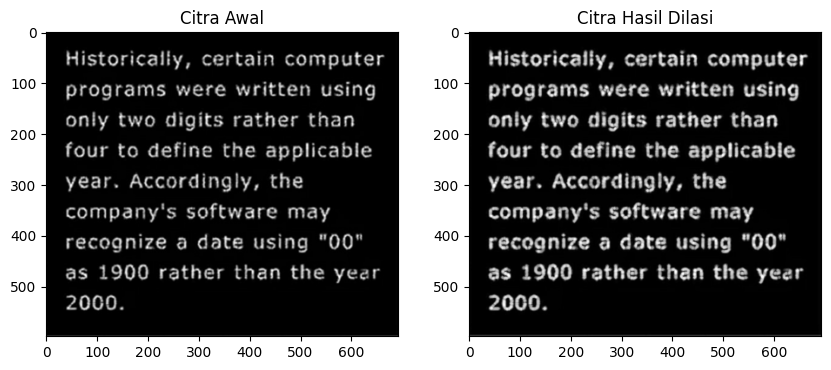

In [45]:
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
image = cv2.imread(image_path, 0)

def dilate(image):
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)
    result = cv2.dilate(image, kernel, iterations=1)
    return result

dilated_image = dilate(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(image, cmap='gray')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title("Citra Hasil Dilasi")
plt.imshow(dilated_image, cmap='gray')
plt.axis('on')

plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)


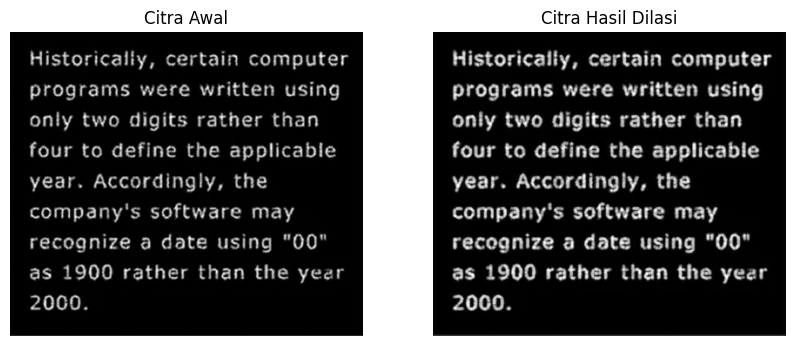

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [46]:
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
image = cv2.imread(image_path, 0)

def dilate(image):
    cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    dilated_image = cv2.dilate(image, cross_kernel)
    return dilated_image, cross_kernel

dilated_image, cross_kernel = dilate(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

print("Structuring Element (Cross 3x3):")
print(cross_kernel)


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

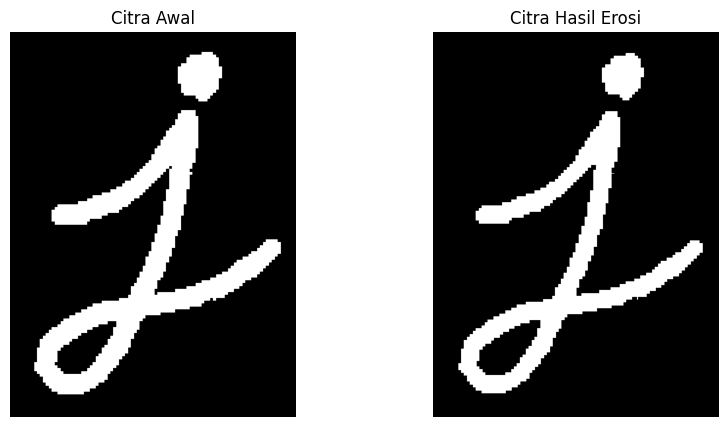

In [47]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image = cv2.imread(image_path, 0)

_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

def erode(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    eroded_image = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant', constant_values=0)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            if np.all(region == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

eroded_image = erode(binary_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Structuring Element (SE) Square 5x5:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


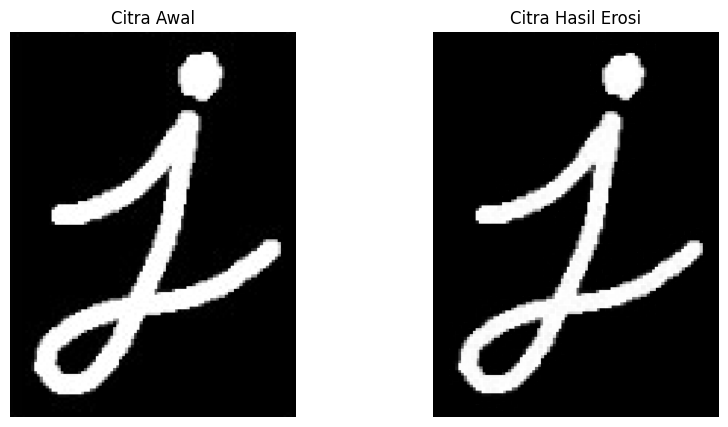

In [48]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image = cv2.imread(image_path, 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

print("Structuring Element (SE) Square 5x5:")
print(kernel)

eroded_image = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

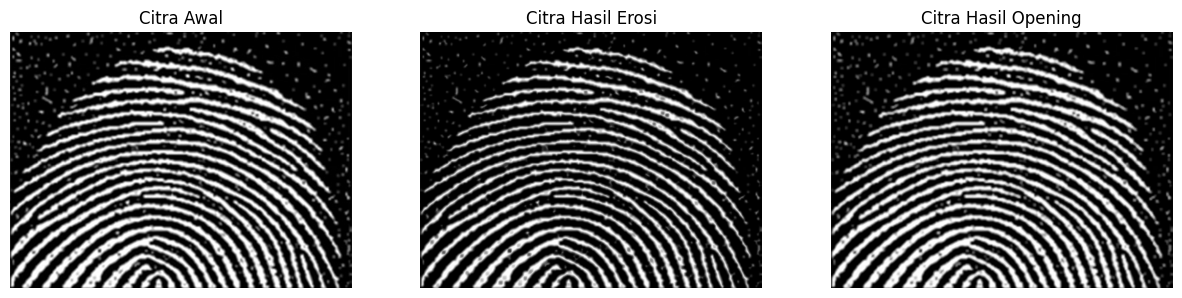

In [49]:
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def erode_manual(image, kernel):
    height, width = image.shape
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]
            if np.all(region == kernel):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0
    return eroded_image

def dilate_manual(image, kernel):
    height, width = image.shape
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]
            if np.any(region == kernel):
                dilated_image[i, j] = 255
            else:
                dilated_image[i, j] = 0
    return dilated_image

def opening_manual(image):
    kernel = np.ones((3, 3), np.uint8)
    eroded_image = erode_manual(image, kernel)
    opened_image = dilate_manual(eroded_image, kernel)
    return opened_image

def opening_opencv(image):
    kernel = np.ones((3, 3), np.uint8)
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened_image

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Awal")
plt.axis('off')

eroded_image = cv2.erode(image, np.ones((3, 3), np.uint8), iterations=1)
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Citra Hasil Erosi")
plt.axis('off')

opened_image = opening_opencv(image)
plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title("Citra Hasil Opening")
plt.axis('off')

plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

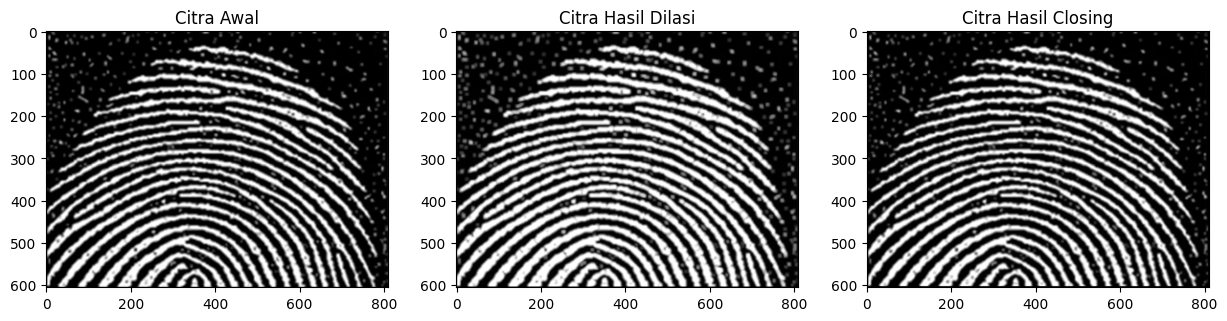

In [50]:
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def dilasi_citra(F, w):
    height, width = F.shape
    image_dilasi = np.zeros((height, width), dtype=np.uint8)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            image_dilasi[i, j] = np.max(temp * structure_element)

    return image_dilasi

def closing_citra(F, w):
    dilated_image = dilasi_citra(F, w)
    eroded_image = erosi_citra(dilated_image, w)
    return eroded_image

def erosi_citra(F, w):
    height, width = F.shape
    image_erosi = np.zeros((height, width), dtype=np.uint8)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            eroded_value = np.min(temp * structure_element)
            image_erosi[i, j] = eroded_value

    return image_erosi

w = 3

hasil_dilasi = dilasi_citra(image, w)
hasil_closing = closing_citra(image, w)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(hasil_dilasi, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Citra Hasil Closing')
plt.imshow(hasil_closing, cmap='gray')

plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

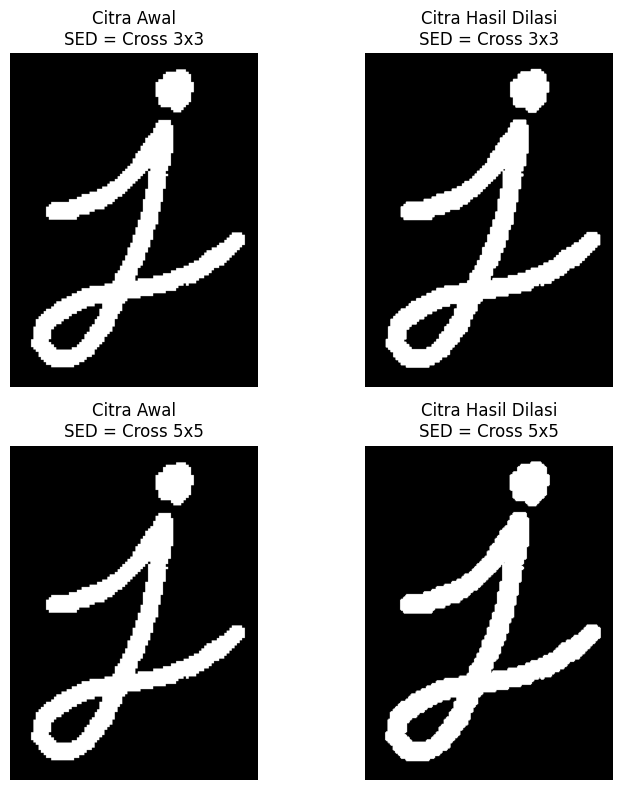

In [43]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image1 = cv2.imread(image_path, 0)
_, binary_img = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)

cross3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

dilated_img_3x3 = cv2.dilate(binary_img, cross3)
dilated_img_5x5 = cv2.dilate(binary_img, cross5)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Cross 3x3')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_img_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Cross 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_img_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

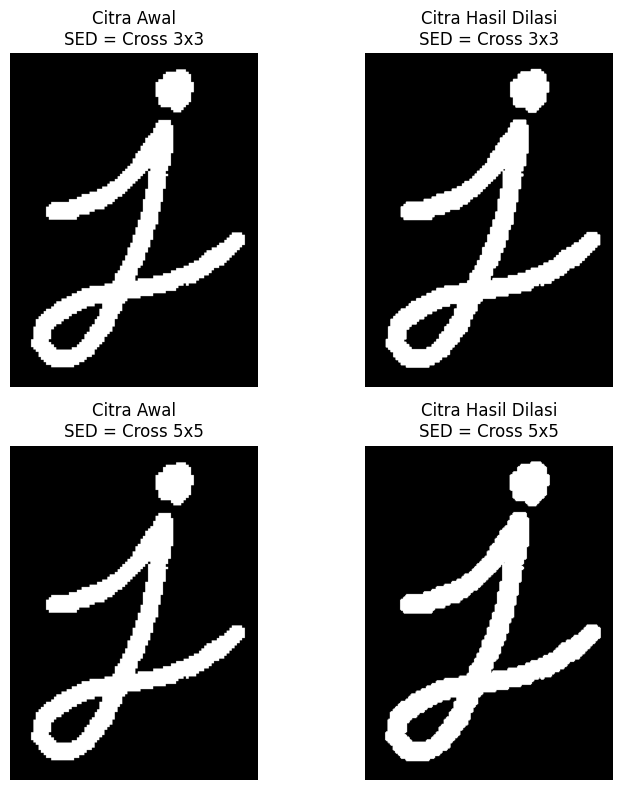

In [51]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image1 = cv2.imread(image_path, 0)
_, binary_img = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
cross3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
dilated_img_3x3 = cv2.dilate(binary_img, cross3)
dilated_img_5x5 = cv2.dilate(binary_img, cross5)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Cross 3x3')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_img_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Cross 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_img_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

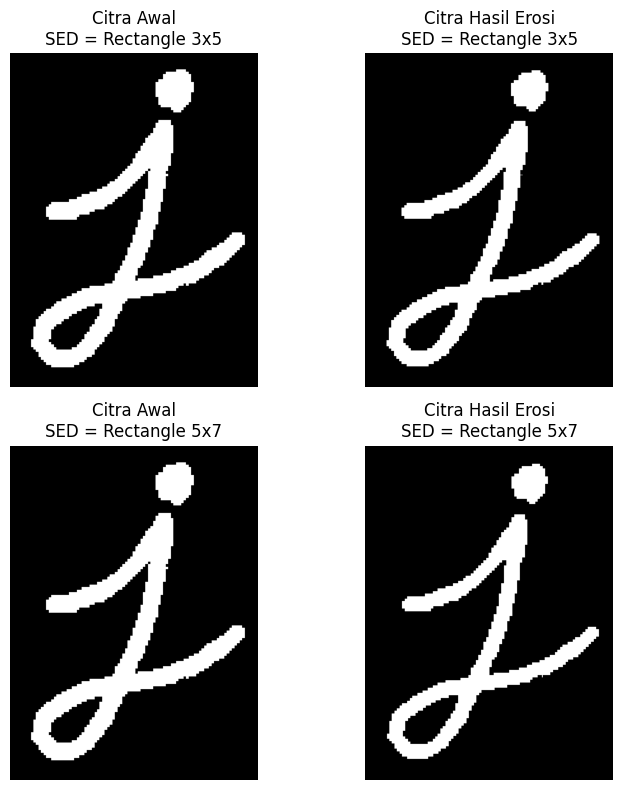

In [52]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image1 = cv2.imread(image_path, 0)
_, binary_img = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
rect3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
rect5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))
eroded_img_3x5 = cv2.erode(binary_img, rect3x5)
eroded_img_5x7 = cv2.erode(binary_img, rect5x7)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Rectangle 3x5')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_img_3x5, cmap='gray')
plt.title('Citra Hasil Erosi\nSED = Rectangle 3x5')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Rectangle 5x7')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_img_5x7, cmap='gray')
plt.title('Citra Hasil Erosi\nSED = Rectangle 5x7')
plt.axis('off')

plt.tight_layout()
plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)  


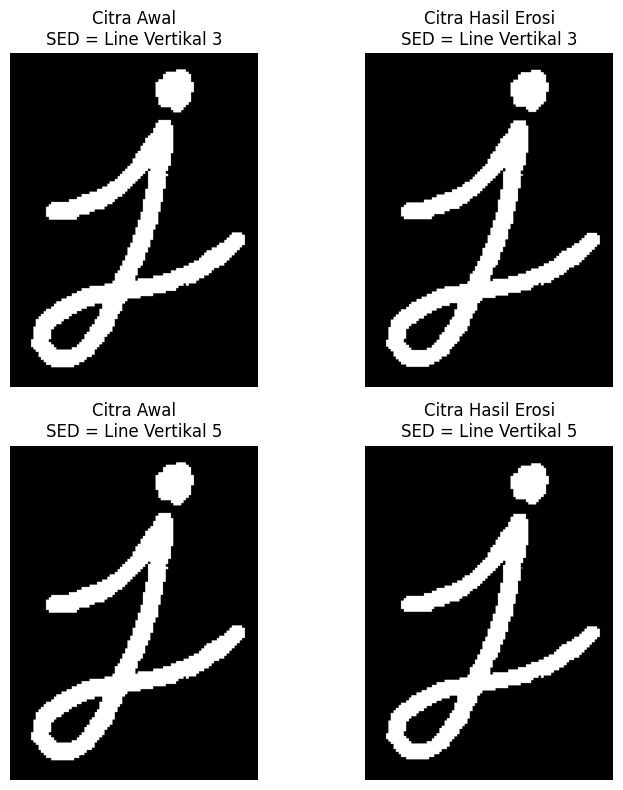

In [53]:
image_path = '/content/drive/MyDrive/PCVK/j.png'
image1 = cv2.imread(image_path, 0)
_, binary_img = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
line_vert_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
line_vert_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
eroded_img_3 = cv2.erode(binary_img, line_vert_3)
eroded_img_5 = cv2.erode(binary_img, line_vert_5)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Line Vertikal 3')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_img_3, cmap='gray')
plt.title('Citra Hasil Erosi\nSED = Line Vertikal 3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal\nSED = Line Vertikal 5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_img_5, cmap='gray')
plt.title('Citra Hasil Erosi\nSED = Line Vertikal 5')
plt.axis('off')

plt.tight_layout()
plt.show()
